In [9]:
# 1. This problem involves hyperplanes in two dimensions.
# (a) Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of
# points for which 1 + 3X1 − X2 > 0, as well as the set of points
# for which 1 + 3X1 − X2 < 0.
# (b) On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0.
# Indicate the set of points for which −2+ X1 +2X2 > 0, as well
# as the set of points for which −2+ X1 + 2X2 < 0.


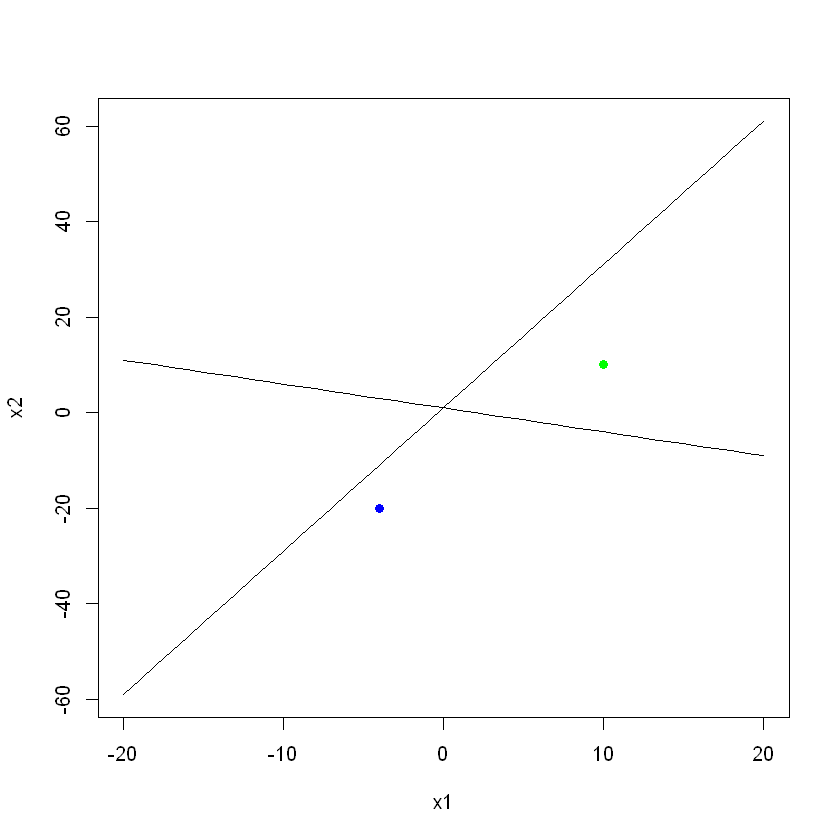

In [10]:
x1= -20:20
x2 = 1+3*x1
plot(x1,x2, type="l")
lines(x1, 1 - x1/2)
points(-4,-20,col="blue",pch=19)
points(10,10,col="green",pch=19)
#Green one >0, blue <0

In [11]:
# 2. We have seen that in p = 2 dimensions, a linear decision boundary
# takes the form β0+β1X1+β2X2 = 0.We now investigate a non-linear
# decision boundary.
# (a) Sketch the curve
# (1 + X1)2 + (2 − X2)2 = 4.

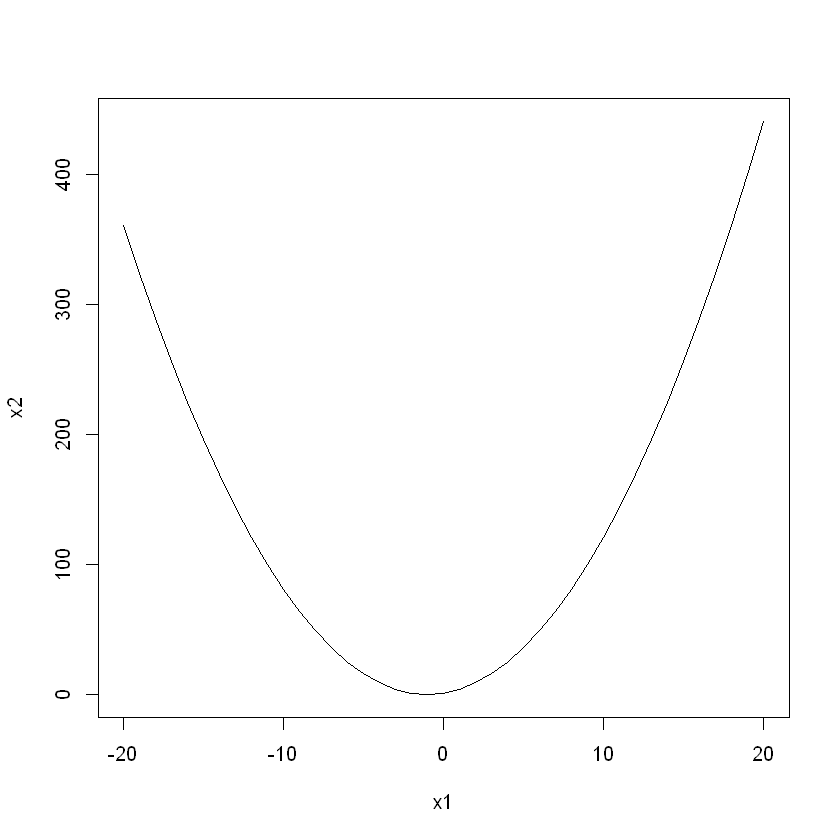

In [12]:
x1= -20:20
x2 = (1+x1)^2
plot(x1,x2, type="l")


In [13]:
# 4. Generate a simulated two-class data set with 100 observations and
# two features in which there is a visible but non-linear separation between
# the two classes. Show that in this setting, a support vector
# machine with a polynomial kernel (with degree greater than 1) or a
# radial kernel will outperform a support vector classifier on the training
# data. Which technique performs best on the test data? Make
# plots and report training and test error rates in order to back up
# your assertions.

In [14]:
x=matrix(rnorm(100*2), ncol=2)
y=c(rep(0,70), rep(1,30))
x[1:30,]=x[1:30,]+4
x[31:70,]=x[31:70,]-4
df=data.frame(x=x, y=as.factor(y))

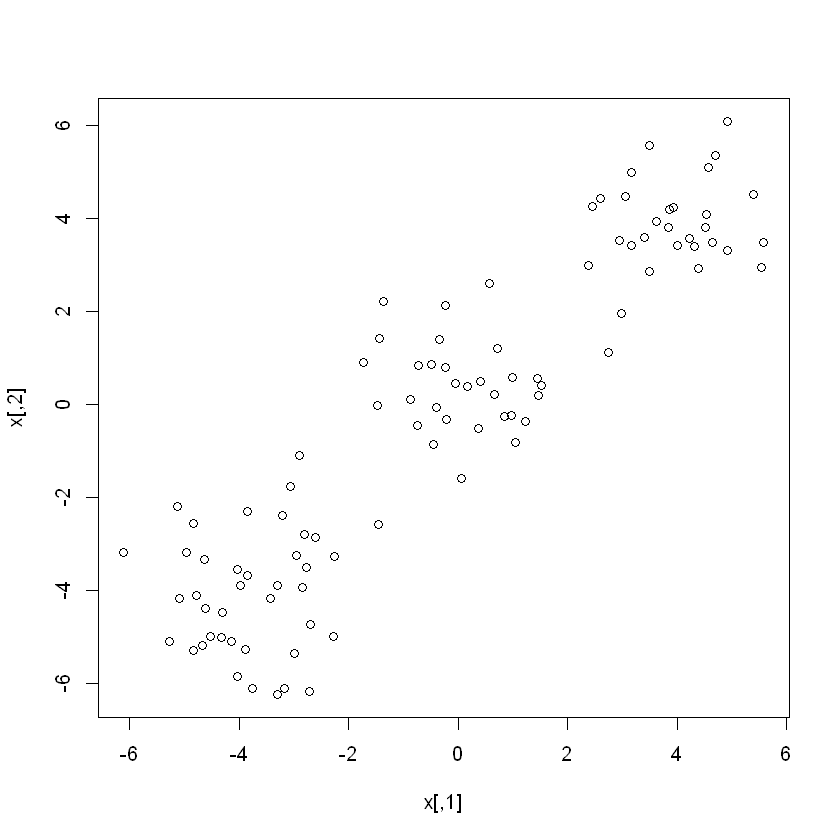

In [15]:
plot(x)

In [17]:
library("caTools")
sample = sample.split(df$x.1, SplitRatio = 0.6)
train = subset(df, sample==TRUE)
test = subset(df, sample==FALSE)

In [18]:
train

,x.1,x.2,y
,<dbl>,<dbl>,<fct>
1,4.57449830,5.09833067,0
2,3.85204828,4.19612368,0
3,5.58055360,3.47615211,0
5,2.60319889,4.42875483,0
9,3.83117226,3.80065159,0
12,3.92828365,4.23677068,0
13,4.22555003,3.57394495,0
14,2.98211137,1.95527998,0
17,3.40266266,3.59597656,0


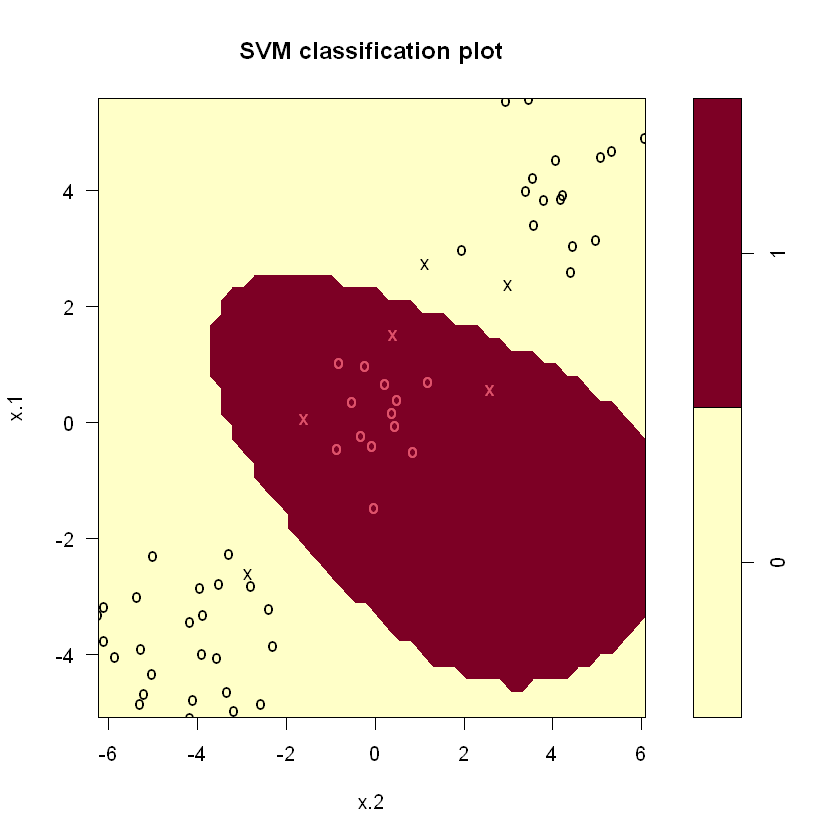

In [19]:
library("e1071")
svm_l = svm(y~., data=train, kernel="radial", cost=5)
plot(svm_l, train)

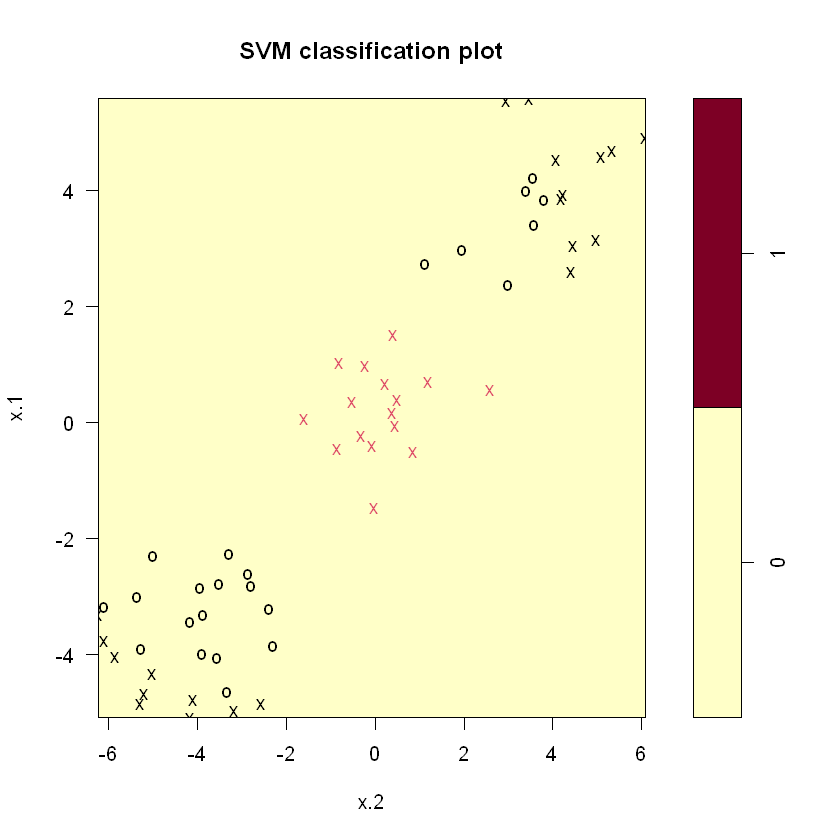

In [20]:
svm_l = svm(y~., data=train, kernel="linear", cost=5)
plot(svm_l, train)
#for the shape and distribution of our information the linear model can classify it, we rather use the radial model

In [ ]:
# 7. In this problem, you will use support vector approaches in order to
# predict whether a given car gets high or low gas mileage based on the
# Auto data set.
# (a) Create a binary variable that takes on a 1 for cars with gas
# mileage above the median, and a 0 for cars with gas mileage
# below the median.


In [21]:
library(ISLR)
bi_var <- ifelse(Auto$mpg >median(Auto$mpg),1,0)
Auto$new_var = as.factor(bi_var)
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,new_var
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0
7,14,8,454,220,4354,9.0,70,1,chevrolet impala,0
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii,0
9,14,8,455,225,4425,10.0,70,1,pontiac catalina,0


In [ ]:
# (b) Fit a support vector classifier to the data with various values
# of cost, in order to predict whether a car gets high or low gas
# mileage. Report the cross-validation errors associated with different
# values of this parameter. Comment on your results.


In [30]:
tunes = tune(svm,new_var~., data=Auto, kernel= "linear", ranges= list(cost=c(0.001,0.01,0.1,1,10,100)) )
summary(tunes)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01269231 

- Detailed performance results:
   cost      error dispersion
1 1e-03 0.09442308 0.02980145
2 1e-02 0.07653846 0.03199026
3 1e-01 0.05102564 0.03822721
4 1e+00 0.01269231 0.02154160
5 1e+01 0.01788462 0.01727588
6 1e+02 0.03064103 0.02026380


In [31]:

# c) Now repeat (b), this time using SVMs with radial and polynomial
# basis kernels, with different values of gamma and degree and
# cost. Comment on your results.

In [34]:
tunes2 = tune(svm,new_var~., data=Auto, kernel= "radial", ranges= list(cost=c(0.001,0.01,0.1,1,10,100)) )
summary(tunes)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  100

- best performance: 0.3316026 

- Detailed performance results:
   cost     error dispersion
1 1e-03 0.5560897 0.03676859
2 1e-02 0.5560897 0.03676859
3 1e-01 0.5560897 0.03676859
4 1e+00 0.5560897 0.03676859
5 1e+01 0.5560897 0.03676859
6 1e+02 0.3316026 0.14135097


In [35]:
tunes3 = tune(svm,new_var~., data=Auto, kernel= "polynomial", ranges= list(cost=c(0.001,0.01,0.1,1,10,100)) )
summary(tunes)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  100

- best performance: 0.3316026 

- Detailed performance results:
   cost     error dispersion
1 1e-03 0.5560897 0.03676859
2 1e-02 0.5560897 0.03676859
3 1e-01 0.5560897 0.03676859
4 1e+00 0.5560897 0.03676859
5 1e+01 0.5560897 0.03676859
6 1e+02 0.3316026 0.14135097


In [38]:
# d) Make some plots to back up your assertions in (b) and (c).
svm1 = svm(new_var~., data=Auto, kernel= "linear", cost=1)
svm2 = svm(new_var~., data=Auto, kernel= "radial", cost=100)
svm3 = svm(new_var~., data=Auto, kernel= "polynomial", cost=100)
plot(svm1,Auto,)

ERROR: Error in parse(text = x, srcfile = src): <text>:5:17: unexpected ')'
4: svm3 = svm(new_var~., data=Auto, kernel= "polynomial", cost=100)
5: plot(svm1,Auto,~)
                   ^


In [ ]:
# 8. This problem involves the OJ data set which is part of the ISLR
# package.
# 372 9. Support Vector Machines
# (a) Create a training set containing a random sample of 800
# observations, and a test set containing the remaining
# observations.

In [40]:
sample = sample.split(OJ$Purchase, SplitRatio = 0.3)
train = subset(OJ, sample==TRUE)
test = subset(OJ, sample==FALSE)


In [ ]:
# (b) Fit a support vector classifier to the training data using
# cost=0.01, with Purchase as the response and the other variables
# as predictors. Use the summary() function to produce summary
# statistics, and describe the results obtained.

In [41]:
svm.model = svm(Purchase~., data = train, kernel = "linear", cost=0.01)
summary(svm.model)


Call:
svm(formula = Purchase ~ ., data = train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  212

 ( 107 105 )


Number of Classes:  2 

Levels: 
 CH MM




In [ ]:
# (c) What are the training and test error rates?

In [42]:
train_pred = predict(svm.model, train)
table(train$Purchase, train_pred)

    train_pred
      CH  MM
  CH 177  19
  MM  32  93

In [44]:
test_pred = predict(svm.model, test)
table(test$Purchase, test_pred)

    test_pred
      CH  MM
  CH 380  77
  MM  58 234

In [ ]:
# (d) Use the tune() function to select an optimal cost. Consider values
# in the range 0.01 to 10.

In [46]:
tunes4 = tune(svm,Purchase ~., data=train, kernel= "linear", ranges= list(cost=c(0.001,0.01,0.1,1,10)) )
summary(tunes4)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 0.01

- best performance: 0.1710227 

- Detailed performance results:
   cost     error dispersion
1 1e-03 0.3891098 0.10791065
2 1e-02 0.1710227 0.06961097
3 1e-01 0.1866477 0.06785287
4 1e+00 0.1772727 0.07093050
5 1e+01 0.1771780 0.07904087


In [ ]:
# (e) Compute the training and test error rates using this new value
# for cost.

In [47]:
svm.model = svm(Purchase~., data = train, kernel = "linear", cost=0.01)
test_pred = predict(svm.model, test)
table(test$Purchase, test_pred)

    test_pred
      CH  MM
  CH 380  77
  MM  58 234

In [ ]:
# (f) Repeat parts (b) through (e) using a support vector machine
# with a radial kernel. Use the default value for gamma.
